In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

Read in data by setting date of delict as index and parsing index as datetime-type.

In [2]:
df = pd.read_csv('./data/Fahrraddiebstahl.csv', index_col=1, parse_dates=True, encoding='unicode_escape')

### Inspect
* check data types
* check missing vals
* check duplicates

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24610 entries, 2023-02-18 to 2022-01-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANGELEGT_AM            24610 non-null  object
 1   TATZEIT_ANFANG_STUNDE  24610 non-null  int64 
 2   TATZEIT_ENDE_DATUM     24610 non-null  object
 3   TATZEIT_ENDE_STUNDE    24610 non-null  int64 
 4   LOR                    24610 non-null  int64 
 5   SCHADENSHOEHE          24610 non-null  int64 
 6   VERSUCH                24610 non-null  object
 7   ART_DES_FAHRRADS       24610 non-null  object
 8   DELIKT                 24610 non-null  object
 9   ERFASSUNGSGRUND        24610 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


Need for parsing date-related cols as datetime types (see below transformation on this).

In [4]:
df.head(3)

,ANGELEGT_AM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
TATZEIT_ANFANG_DATUM,,,,,,,,,,
2023-02-18,19.02.2023,18,19.02.2023,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-18,19.02.2023,20,19.02.2023,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-18,19.02.2023,16,19.02.2023,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [5]:
df.LOR.unique()

array([ 3701658,  1100308,  6100102,  7601544,  3601346,  3400723,
        1200522,  5300737,  3701554,  3400620,  1300834,  2500835,
        3601245,  2200208,  2100104,  3601141,  8100312,  9501940,
        2200211, 12400720,  6400839,  9100304, 11501340,  9401329,
        4300517,  6200421,  2500830,  5200632,  2200209,  7300619,
       11501341,  3601348, 11300725,  3601140,  2400520,  2500727,
        1100102,  4501042,  2200207,  7400720,  7200308,  4501147,
        3601243,  6100206,  4501149,  2200212,  7100205,  4400830,
        7100204,  8100311, 10100315,  1300733,  4300622,  1100312,
        8100415, 12200515,  1100414,  1300835, 12400617,  4200310,
        4501044, 11300724,  7200411,  4300620,  4501148,  9200715,
        7200410,  3701555, 11100101,  2200210,  4501043,  7100101,
        8100418,  1200625,  5300840, 11200513,  2200213, 10200417,
        1401048,  1100103,  1100313,  2400623, 12500825,  9300921,
        2300417,  2400522,  3300412,  2500834,  8100209,  9100

Need to include "leading zeroes" so that first two digits of these "LOR" can be matched with a dictionary, which maps keys with districts (see below transformation on this).

In [6]:
df.isna().sum().sum()

0

In [7]:
duplicate_vals = df[df.duplicated()]
duplicate_vals

,ANGELEGT_AM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
TATZEIT_ANFANG_DATUM,,,,,,,,,,
2023-02-16,17.02.2023,19,17.02.2023,7,2200210,360,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-10-02,16.02.2023,15,13.02.2023,15,3100102,500,Nein,Kinderfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-01-17,18.01.2023,16,18.01.2023,13,1100103,316,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-07-01,10.01.2023,2,07.01.2023,10,2200212,1116,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2022-12-17,04.01.2023,11,17.12.2022,11,3601451,1800,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2022-12-28,28.12.2022,15,28.12.2022,15,2100102,50,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2022-12-28,28.12.2022,15,28.12.2022,15,2100102,50,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2022-12-28,28.12.2022,15,28.12.2022,15,2100102,50,Nein,diverse Fahrräder,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2022-11-25,25.11.2022,19,25.11.2022,20,1100310,1800,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


Drop duplicated registries since they don't even represent 1% of total datapoints.

In [8]:
df_dropped_duplicates = df.drop_duplicates()
assert len(df) - len(df_dropped_duplicates) == len(duplicate_vals) 


### Plot given data
* check time series
    - resample for weekly, monthly and yearly vals

In [9]:
daily_thefts_count = df_dropped_duplicates.resample('D').size()
daily_thefts_count

TATZEIT_ANFANG_DATUM
2022-01-01    19
2022-01-02    39
2022-01-03    46
2022-01-04    70
2022-01-05    43
              ..
2023-11-28     0
2023-11-29     0
2023-11-30     0
2023-12-01    45
2023-12-02    32
Freq: D, Length: 701, dtype: int64

`.resample(D)` interpolates forward (see index: they go beyond the final date of available dataset, i.e. beyond 2023-02-19). 

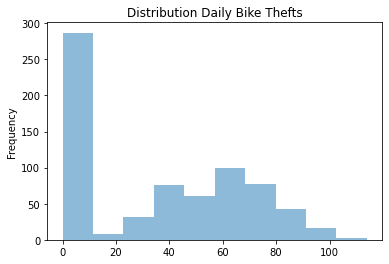

In [10]:
daily_thefts_count.plot.hist(title = 'Distribution Daily Bike Thefts', alpha = 0.5);

Named interpolation "forward" leads to a distorted distribution (since each interpolated datapoint accounts for 1 additional count).

In [11]:
daily_thefts_count.describe().round(0)

count    701.0
mean      35.0
std       33.0
min        0.0
25%        0.0
50%       39.0
75%       65.0
max      114.0
dtype: float64

Control for interpolation forward by specifying the exact dates to be analyzed:

In [12]:
daily_thefts = df_dropped_duplicates.loc['2022-01-01':'2023-02-19'].resample('D').size()
daily_thefts

TATZEIT_ANFANG_DATUM
2022-01-01    19
2022-01-02    39
2022-01-03    46
2022-01-04    70
2022-01-05    43
              ..
2023-02-15    41
2023-02-16    49
2023-02-17    31
2023-02-18    21
2023-02-19     4
Freq: D, Length: 415, dtype: int64

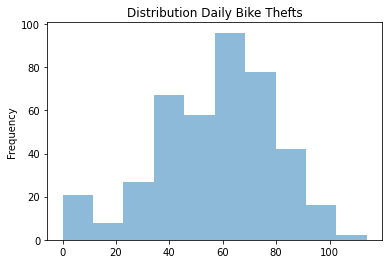

In [13]:
daily_thefts.plot.hist(title = 'Distribution Daily Bike Thefts', alpha = 0.5);

In [14]:
daily_thefts.describe().round(0)

count    415.0
mean      57.0
std       22.0
min        0.0
25%       43.0
50%       59.0
75%       74.0
max      114.0
dtype: float64

In Berlin, and for the time period defined, 57 bikes are stolen daily (give or take 22 bikes per day).
As a reference, in Amsterdam 80.000 bikes are stolen *yearly*: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0279906

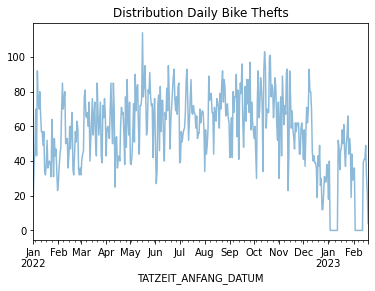

In [15]:
daily_thefts.plot.line(title = 'Distribution Daily Bike Thefts', alpha = 0.5);

Note seasonality in daily bike thefts activity (peaks being in summer and in early fall).
It would be interesting to check in a future project to check for stationarity and making forecasts (e.g. based on an `AR` and/or `ARIMA` model).

* check cats

In [16]:
class PlotBikeThefts():
    '''Plot data with seaborn.'''

    def plot_categoricals(self, df, ordinate) -> sns:
            return sns.catplot(
            data=df, y=ordinate, kind="count",
            palette="pastel", edgecolor=".6",
            alpha = 0.5
        )

    def plot_correlations(self, df) -> sns:
        corr = df.corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))
        f, ax = plt.subplots(figsize=(8, 6))
        plt.xticks(rotation=45)
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        return sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
plot_bike_thefts = PlotBikeThefts()

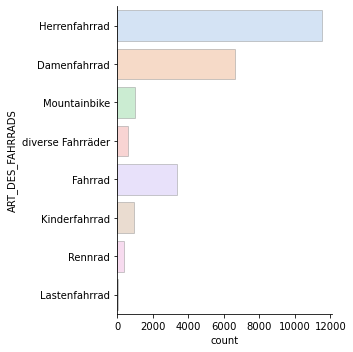

In [18]:
plot_bike_thefts.plot_categoricals(df_dropped_duplicates, 'ART_DES_FAHRRADS');

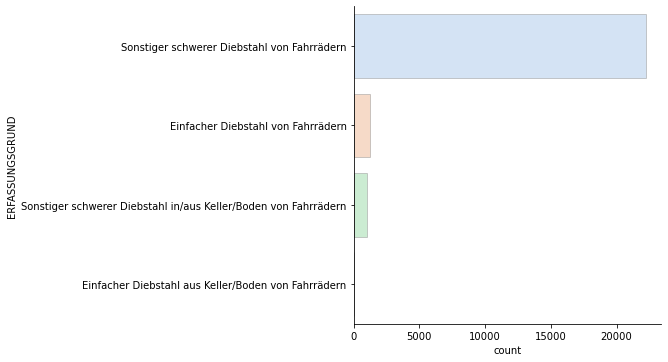

In [19]:
plot_bike_thefts.plot_categoricals(df_dropped_duplicates, 'ERFASSUNGSGRUND');

It would be interesting to clarify how "schwerer Diebstahl" actually is defined.

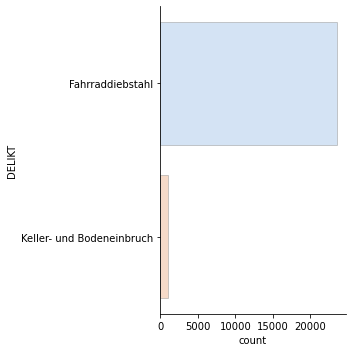

In [20]:
plot_bike_thefts.plot_categoricals(df_dropped_duplicates, 'DELIKT');

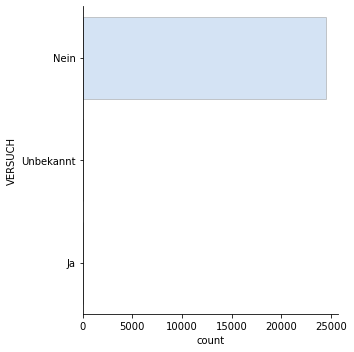

In [21]:
plot_bike_thefts.plot_categoricals(df_dropped_duplicates, 'VERSUCH');

* get (pearson) correlation

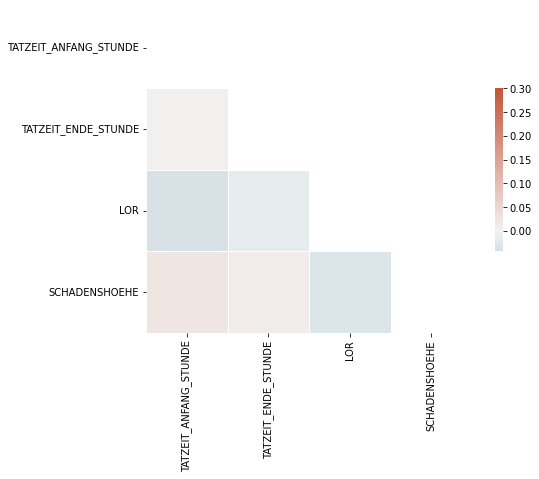

In [22]:
plot_bike_thefts.plot_correlations(df_dropped_duplicates);

No notable correlations, except for maybe that the amount of the damage is slightly positively correlated with the time, at which the delict took place. Check time series for this:

In [31]:
df_dropped_duplicates.head(2)

,ANGELEGT_AM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
TATZEIT_ANFANG_DATUM,,,,,,,,,,
2023-02-18,19.02.2023,18,19.02.2023,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-18,19.02.2023,20,19.02.2023,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [32]:
time_vs_damage = df_dropped_duplicates.SCHADENSHOEHE.resample('D').mean()

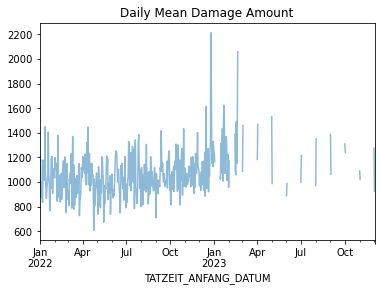

In [34]:
time_vs_damage.plot.line(title = 'Daily Mean Damage Amount', alpha = 0.5);

Correlation analysis should be done based on `spearman`and not `pearson`, since the latter assumes a linear relationship between the variables...which it clearly is not.

### Transform (see `utils.py` and `transform.py`)
* translate `LOR`-col into `districts`
* extract seasonality, trend

### Read in transformed dataset

In [35]:
bike_thefts_transformed = pd.read_csv('./data/bike_thefts_transformed.csv', index_col = 0, parse_dates = True)

In [36]:
bike_thefts_transformed.head(3)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,time_diff,hour,day,week_day,week,year,month,district
ANGELEGT_AM,,,,,,,,,,,,,,,,,,
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000018,2023-02-19,1970-01-01 00:00:00.000000007,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,-1.833333e-10,0,19,6,7,2023,2,Pankow
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000020,2023-02-19,1970-01-01 00:00:00.000000009,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,-1.833333e-10,0,19,6,7,2023,2,Pankow
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000016,2023-02-19,1970-01-01 00:00:00.000000000,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,-2.666667e-10,0,19,6,7,2023,2,Pankow


In future project, check column on duration of thefts. Keep only the below cols for this analysis.

In [37]:
bike_thefts_final = bike_thefts_transformed[['damage_amount', 'bike_type', 'year', 'month', 'district']]
bike_thefts_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24610 entries, 2023-02-19 to 2022-01-01
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   damage_amount  24610 non-null  int64 
 1   bike_type      24610 non-null  object
 2   year           24610 non-null  int64 
 3   month          24610 non-null  int64 
 4   district       24610 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [38]:
bike_thefts_final

,damage_amount,bike_type,year,month,district
ANGELEGT_AM,,,,,
2023-02-19,3472,Herrenfahrrad,2023,2,Pankow
2023-02-19,2277,Herrenfahrrad,2023,2,Pankow
2023-02-19,746,Damenfahrrad,2023,2,Pankow
2023-02-19,1849,Herrenfahrrad,2023,2,Pankow
2023-02-19,1863,Herrenfahrrad,2023,2,Pankow
...,...,...,...,...,...
2022-02-01,660,Damenfahrrad,2022,2,Tempelhof-Schöneberg
2022-01-01,1000,Herrenfahrrad,2022,1,Mitte
2022-01-01,190,Herrenfahrrad,2022,1,Mitte


In [39]:
bike_thefts_final.corr('spearman')

,damage_amount,year,month
damage_amount,1.000000,0.050879,0.000730
year,0.050879,1.000000,-0.242566
month,0.000730,-0.242566,1.000000


No conclusion possible...

In [40]:
bike_thefts_final_districts_bike_types = pd.crosstab(bike_thefts_final.district, bike_thefts_final.bike_type)
bike_thefts_final_districts_bike_types

bike_type,Damenfahrrad,Fahrrad,Herrenfahrrad,Kinderfahrrad,Lastenfahrrad,Mountainbike,Rennrad,diverse Fahrräder
district,,,,,,,,
Charlottenburg-Wilmersdorf,760,356,1341,118,5,114,34,68
Friedrichshain-Kreuzberg,1015,514,1765,125,7,160,51,103
Lichtenberg,308,154,577,41,1,51,14,24
Marzahn-Hellersdorf,184,96,301,22,1,21,8,19
Mitte,1165,638,1932,173,15,178,68,125
Neukölln,480,286,869,68,7,78,25,51
Pankow,941,504,1592,133,11,147,50,77
Reinickendorf,333,145,579,41,1,45,22,36
Spandau,207,126,397,40,2,30,15,21


### Starting point for analyses:
* how many bikes have been stolen per district?
* how many bikes, based on bike types, have been stolen per district?
* what is the distribution of amount of damage per district?
* what is the average amount of damage per district?

How many bikes, based on bike types, have been stolen per district (within time period of analysis)?

In [41]:
bike_thefts_final_districts_bike_types = bike_thefts_final_districts_bike_types.T
bike_thefts_final_districts_bike_types

district,Charlottenburg-Wilmersdorf,Friedrichshain-Kreuzberg,Lichtenberg,Marzahn-Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Treptow-Köpenick
bike_type,,,,,,,,,,,,
Damenfahrrad,760,1015,308,184,1165,480,941,333,207,441,429,376
Fahrrad,356,514,154,96,638,286,504,145,126,183,226,177
Herrenfahrrad,1341,1765,577,301,1932,869,1592,579,397,761,778,640
Kinderfahrrad,118,125,41,22,173,68,133,41,40,54,79,63
Lastenfahrrad,5,7,1,1,15,7,11,1,2,4,5,2
Mountainbike,114,160,51,21,178,78,147,45,30,74,65,62
Rennrad,34,51,14,8,68,25,50,22,15,31,18,20
diverse Fahrräder,68,103,24,19,125,51,77,36,21,45,36,30


In [42]:
district_list = list(bike_thefts_final_districts_bike_types.columns)

In [43]:
bike_thefts_district_details = bike_thefts_final_districts_bike_types.reset_index()

In [44]:
melted_bike_thefts = bike_thefts_district_details.melt(
    id_vars='bike_type',
    value_vars = district_list,
    value_name= 'number_thefts',
)
melted_bike_thefts 

,bike_type,district,number_thefts
0,Damenfahrrad,Charlottenburg-Wilmersdorf,760
1,Fahrrad,Charlottenburg-Wilmersdorf,356
2,Herrenfahrrad,Charlottenburg-Wilmersdorf,1341
3,Kinderfahrrad,Charlottenburg-Wilmersdorf,118
4,Lastenfahrrad,Charlottenburg-Wilmersdorf,5
...,...,...,...
91,Kinderfahrrad,Treptow-Köpenick,63
92,Lastenfahrrad,Treptow-Köpenick,2
93,Mountainbike,Treptow-Köpenick,62
94,Rennrad,Treptow-Köpenick,20


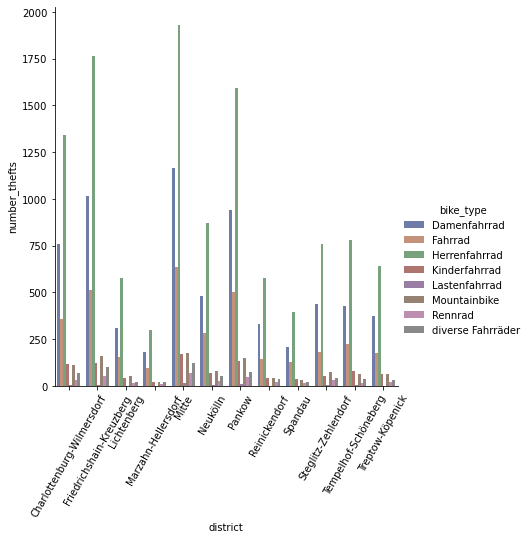

In [45]:
bike_thefts_district_plot = sns.catplot(
    data=melted_bike_thefts , kind="bar",
    x="district", y="number_thefts", hue="bike_type", palette="dark", alpha=.6, height=6
)

for axes in bike_thefts_district_plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=60)
plt.show()

What is the distribution of amount of damage per district?

In [46]:
bike_thefts_final_districts_bike_types.describe().round(2)

district,Charlottenburg-Wilmersdorf,Friedrichshain-Kreuzberg,Lichtenberg,Marzahn-Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Treptow-Köpenick
count,8.0,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00
mean,349.5,467.50,146.25,81.50,536.75,233.00,431.88,150.25,104.75,199.12,204.50,171.25
std,471.8,622.86,201.94,108.16,683.91,304.03,564.38,204.26,137.18,267.60,272.02,225.77
min,5.0,7.00,1.00,1.00,15.00,7.00,11.00,1.00,2.00,4.00,5.00,2.00
25%,59.5,90.00,21.50,16.25,110.75,44.50,70.25,32.50,19.50,41.50,31.50,27.50
50%,116.0,142.50,46.00,21.50,175.50,73.00,140.00,43.00,35.00,64.00,72.00,62.50
75%,457.0,639.25,192.50,118.00,769.75,334.50,613.25,192.00,146.25,247.50,276.75,226.75
max,1341.0,1765.00,577.00,301.00,1932.00,869.00,1592.00,579.00,397.00,761.00,778.00,640.00


<Figure size 576x396 with 0 Axes>

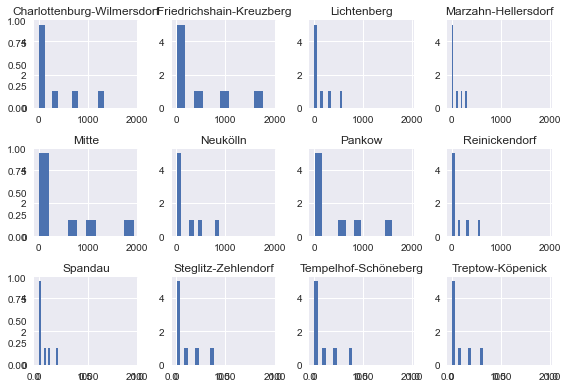

In [47]:
plt.style.use('seaborn')
n_rows, n_cols = (3,4)
fig = plt.figure()
n_bins = 10

fig, ax = plt.subplots(n_rows, n_cols, tight_layout = True, sharex='all', sharey='all')

DISTRICTS  = list(bike_thefts_final_districts_bike_types.columns)

ax_fillable = list()
for idx, district in enumerate(DISTRICTS):
    ax = fig.add_subplot(n_rows, n_cols, idx +1)
    ax.hist(bike_thefts_final_districts_bike_types[district], bins = n_bins)
    ax.set_title(f'{district}')
    ax_fillable.append(ax)

ax_fillable[0].get_shared_x_axes().join((ax_fillable[0]), *ax_fillable)
ax_fillable[0].get_shared_y_axes().join((ax_fillable[0]), *ax_fillable)

In districts Charlottenburg, F'hain-Xberg, Mitte and Pankow damages are higher than in the other districts: a quarter of the damages there amount to over EUR 1.000.
See also below on mean average damage per district. 

In [48]:
class AggregateThefts():
        '''Analyze data by aggregating by different vals.'''
        
        def aggregate_thefts(self, df: pd.DataFrame, group_variable:str) -> pd.DataFrame:
                '''Calculate aggregated vals per group variable and aggregation variable.'''
                df_filled = df.groupby([group_variable]).size()
                df_filled = pd.DataFrame(df_filled).reset_index()
                return df_filled
        
        def mean_vals(self, df: pd.DataFrame, group_variable:str, aggregate_variable:str) -> pd.DataFrame:
                '''Calculate mean vals per group variable and aggregation variable.'''
                df_filled = df.groupby([group_variable])[aggregate_variable].mean()
                df_filled = pd.DataFrame(df_filled).reset_index().sort_values(by = aggregate_variable, ascending=False)
                return df_filled

How many bikes have been stolen per district?

In [49]:
bike_thefts = AggregateThefts()

In [50]:
thefts_by_district = bike_thefts.aggregate_thefts(bike_thefts_final, 'district')
thefts_by_district.rename(columns={0:'number_bike_thefts'}, inplace=True)
thefts_by_district

,district,number_bike_thefts
0,Charlottenburg-Wilmersdorf,2796
1,Friedrichshain-Kreuzberg,3740
2,Lichtenberg,1170
3,Marzahn-Hellersdorf,652
4,Mitte,4294
5,Neukölln,1864
6,Pankow,3455
7,Reinickendorf,1202
8,Spandau,838
9,Steglitz-Zehlendorf,1593


In [51]:
thefts_by_district.set_index('district', inplace=True)

In [52]:
thefts_by_district.sort_values(by = 'number_bike_thefts', ascending=False, inplace=True)

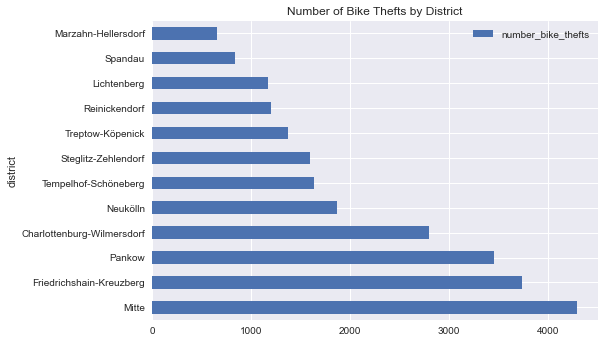

In [53]:
thefts_by_district.plot.barh(title = 'Number of Bike Thefts by District');

Above-mentioned districts also register greatest number of bike thefts.

In [54]:
mean_damage_by_district = bike_thefts.mean_vals(bike_thefts_final, 'district', 'damage_amount')
mean_damage_by_district = round(mean_damage_by_district, 0)
mean_damage_by_district

,district,damage_amount
10,Tempelhof-Schöneberg,1089.0
5,Neukölln,1086.0
4,Mitte,1086.0
1,Friedrichshain-Kreuzberg,1053.0
0,Charlottenburg-Wilmersdorf,1047.0
3,Marzahn-Hellersdorf,1047.0
11,Treptow-Köpenick,1040.0
9,Steglitz-Zehlendorf,1039.0
6,Pankow,1031.0
8,Spandau,1030.0


In [55]:
mean_damage_by_district.set_index('district', inplace = True)

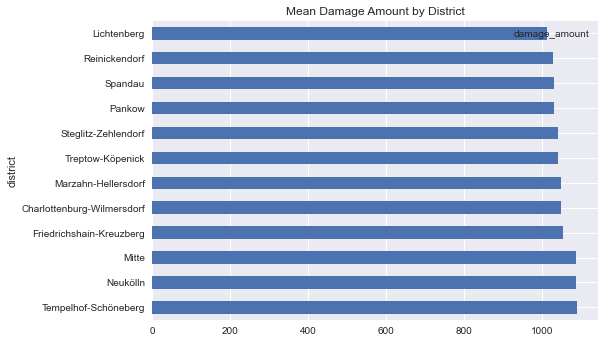

In [56]:
mean_damage_by_district.plot.barh(title = 'Mean Damage Amount by District');